# Modelo de Regressão Linear Simples Dataset E-commerce Customers
por Gabriely da Mata

O modelo possui 8 colunas com informações pessoais, tempo de uso do aplicativo mobile e website. Sendo:


- Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
- Time on App: tempo médio gasto no app em minutos.
- Time on Website: tempo médio gasto no site em minutos.
- Lenght of Membership: Há quantos anos o cliente é membro. O modelo tem por objetivo obter uma estratégia de negócio com base no modelo de ML, verificando onde é melhor investir

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [13]:
import numpy as np

In [3]:
from yellowbrick.regressor import ResidualsPlot

In [8]:
df = pd.read_csv('Ecommerce Customers.csv')

In [9]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [46]:
df['Yearly Amount Spent'].describe()

count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: Yearly Amount Spent, dtype: float64

In [ ]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
pd.get_dummies(df)                                                                             

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Email_aaron04@yahoo.com,Email_aaron11@luna.com,Email_aaron22@gmail.com,Email_aaron89@gmail.com,Email_acampbell@sanchez-velasquez.info,...,Avatar_Teal,Avatar_Thistle,Avatar_Tomato,Avatar_Turquoise,Avatar_Violet,Avatar_Wheat,Avatar_White,Avatar_WhiteSmoke,Avatar_Yellow,Avatar_YellowGreen
0,34.497268,12.655651,39.577668,4.082621,587.951054,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,31.926272,11.109461,37.268959,2.664034,392.204933,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.305557,13.717514,36.721283,3.120179,581.852344,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.330673,12.795189,37.536653,4.446308,599.406092,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,34.702529,11.695736,37.190268,3.576526,529.049004,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,32.646777,11.499409,38.332576,4.958264,551.620145,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,33.322501,12.391423,36.840086,2.336485,456.469510,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


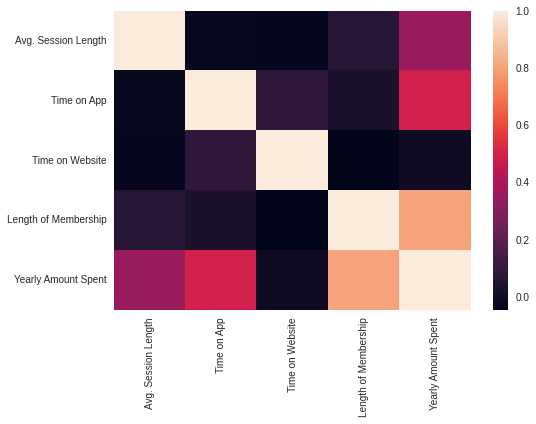

In [11]:
sns.heatmap(df.corr())

In [24]:
y = df['Yearly Amount Spent'].values
X = df['Length of Membership'].values

Para um modelo simples, foi feita a verificação de cada variável independente correlacionada com a dependente a fim de encontrar a com a maior correlação e foi a variável 'Length of Membership'.

In [25]:
corre = np.corrcoef(X, y)
corre

array([[1.        , 0.80908357],
       [0.80908357, 1.        ]])

In [28]:
X = X.reshape(-1,1)
modelo = LinearRegression()

modelo.fit(X, y)

LinearRegression()

In [42]:
#Interceptação do modelo
modelo.intercept_

272.39978605802816

In [43]:
#Inclinação do modelo
modelo.coef_

array([64.21868432])

Visualizando graficamente

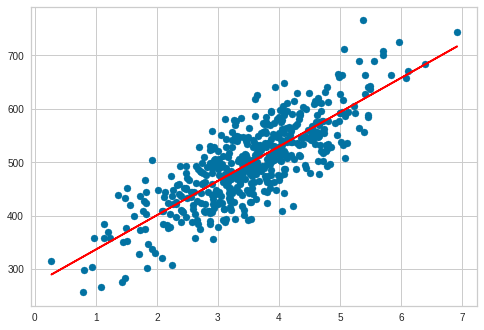

In [44]:
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color='red')

Aplicando a fórmula de regressão linear simples a fim de prever quantos anos de associação precisam para atingir a média do valor anual gasto('Yearly Amount Spent') = ~500.



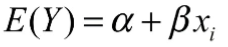

In [50]:
#manual, exemplo de 3 anos, mais aproximado da média
previsao = modelo.intercept_ + (modelo.coef_ * 3)
previsao

array([465.055839])

In [53]:
#Utilizando a função imbutida no sklearn, mesmo exemplo
modelo.predict([[3]])

array([465.055839])

***Conclusão: precisa-se de pelo menos 3 anos de associação para atigir a média de gasto anual, ou seja, o proprietário pode investir em fidelizar por mais tempo os clientes com pelo menos 3 anos a fim de ultrapassar a média anual.

Verificação de resíduos: saber se é um bom modelo de regressão linear ou poderia optar por outra abordagem.
- Tem de estar padronizados, mais próximo possível de uma distribiução normal.

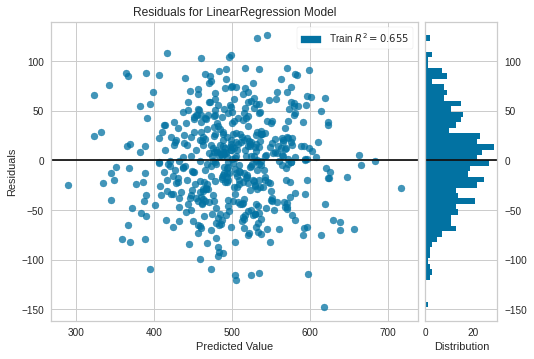

In [54]:
#Gráfico de residuais
residuais = ResidualsPlot(modelo)
residuais.fit(X, y)
residuais.show()

Observa-se que os resíduos estão próximos de uma distribuição normal e com um coeficiente de determinação(R²) bom.